# Data Story Telling

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr


In [2]:
df = pd.read_csv('Different_stores_data_V2.csv')

In [3]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,total_profit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,375.100,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,540.153,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,5.020,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,500.425,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,60.600,Cash,South,Florida,Kanyon


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_no              99457 non-null  object        
 1   invoice_date            99457 non-null  datetime64[ns]
 2   customer_id             99457 non-null  object        
 3   gender                  99457 non-null  object        
 4   age                     99457 non-null  int64         
 5   category                99457 non-null  object        
 6   quantity                99457 non-null  int64         
 7   selling_price_per_unit  99457 non-null  float64       
 8   total_profit            99457 non-null  float64       
 9   payment_method          99457 non-null  object        
 10  region                  99457 non-null  object        
 11  state                   99457 non-null  object        
 12  shopping_mall           99457 non-null  object

# Missing Values

In [4]:
df.isnull().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
total_profit              0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

# Descriptive Stat

In [5]:
df.describe()

,age,quantity,selling_price_per_unit,total_profit
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.004424,689.256321,230.751516
std,14.990054,1.415237,941.184567,425.077533
min,18.000000,1.000000,5.230000,-2625.000000
25%,30.000000,2.000000,45.450000,20.920000
50%,43.000000,3.000000,203.300000,94.687500
75%,56.000000,4.000000,1200.320000,300.080000
max,69.000000,15.000000,5250.000000,7087.500000


# Bin age group together

In [35]:
# bin age group

# Define age bins and labels
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10s', '20s', '30s', '40s', '50s', '60s']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count occurrences for each age group
age_group_counts = df['age_group'].value_counts().sort_index()

age_group_counts

age_group
10s     3780
20s    19263
30s    19287
40s    19153
50s    18931
60s    19043
Name: count, dtype: int64

In [ ]:
'''
Min age is 18
Max age is 69
'''

# Convert & Extract Date Time

In [42]:
# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Extract time components
df['hour'] = df['invoice_date'].dt.hour
df['day'] = df['invoice_date'].dt.day
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year
df['day_of_week'] = df['invoice_date'].dt.day_name()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_no              99457 non-null  object        
 1   invoice_date            99457 non-null  datetime64[ns]
 2   customer_id             99457 non-null  object        
 3   gender                  99457 non-null  object        
 4   age                     99457 non-null  int64         
 5   category                99457 non-null  object        
 6   quantity                99457 non-null  int64         
 7   selling_price_per_unit  99457 non-null  float64       
 8   total_profit            99457 non-null  float64       
 9   payment_method          99457 non-null  object        
 10  region                  99457 non-null  object        
 11  state                   99457 non-null  object        
 12  shopping_mall           99457 non-null  object

In [44]:
# Function to plot total profit by column
def plot_total_profit_in_column(df, column):
    profit_by_dim = df.groupby(column)['total_profit'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=profit_by_dim.index, y=profit_by_dim.values)
    plt.title(f'Total Profit by {column.capitalize()}')
    plt.ylabel('Total Profit')
    plt.xlabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

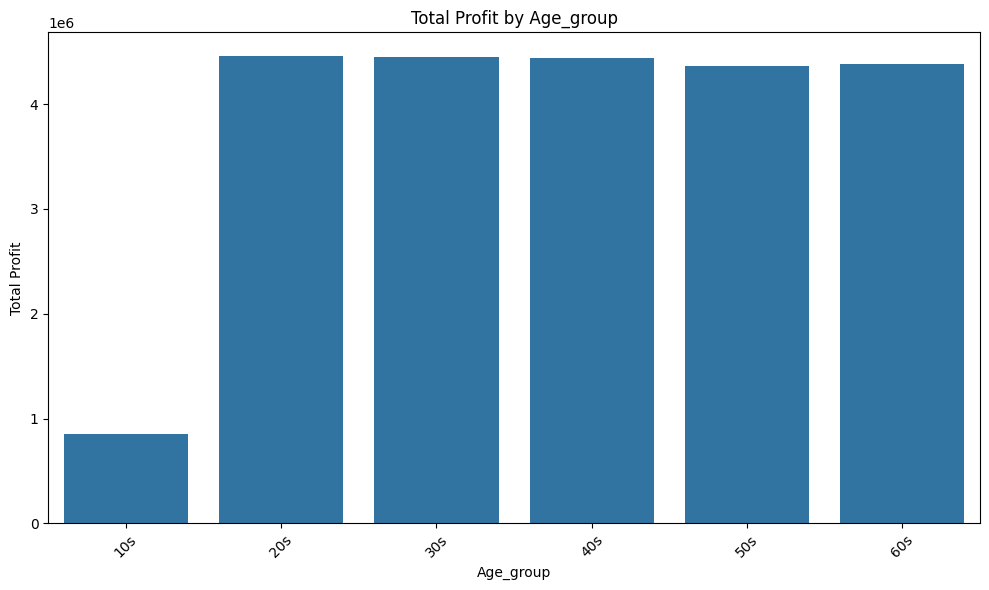

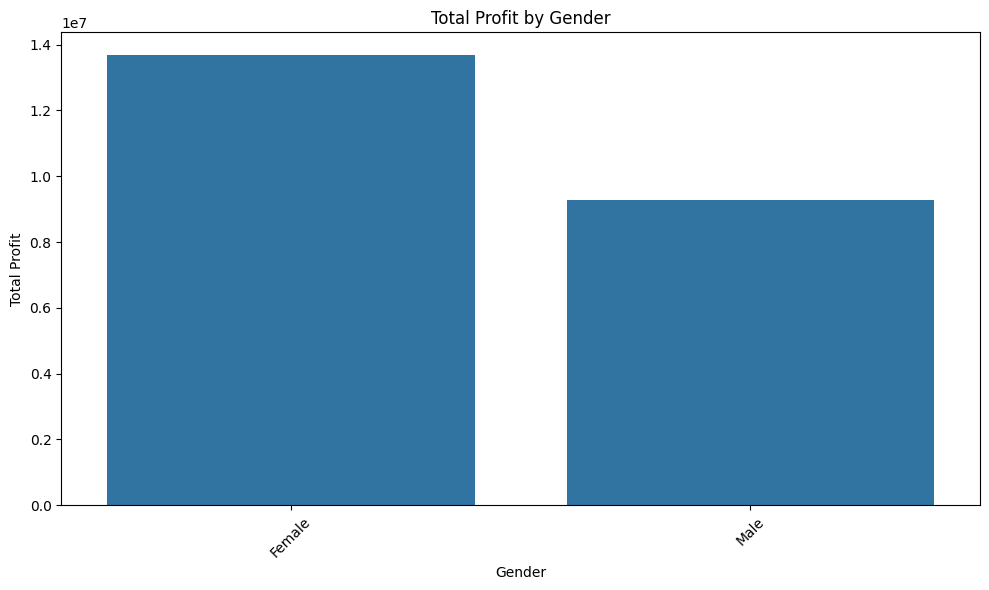

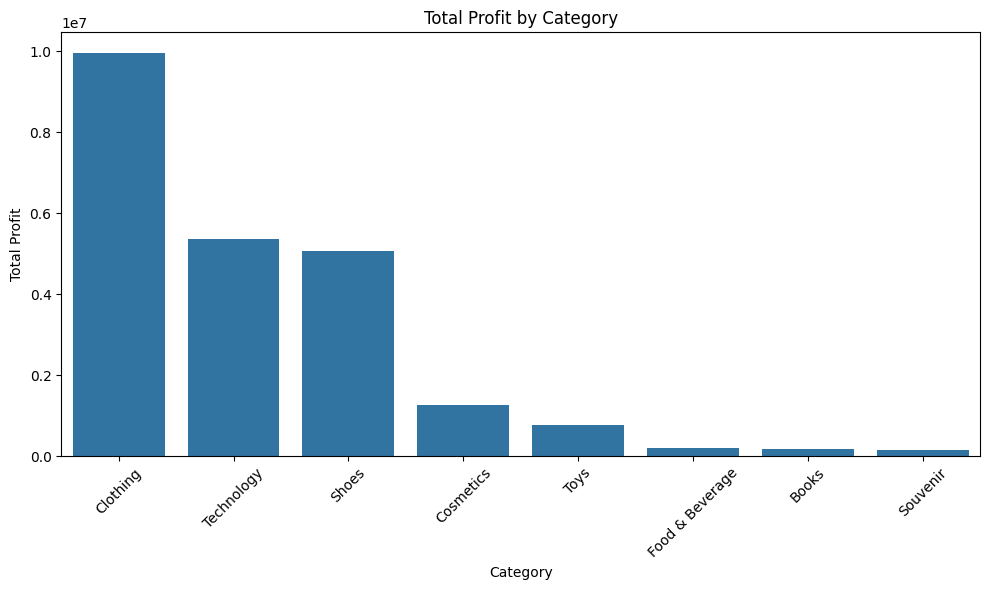

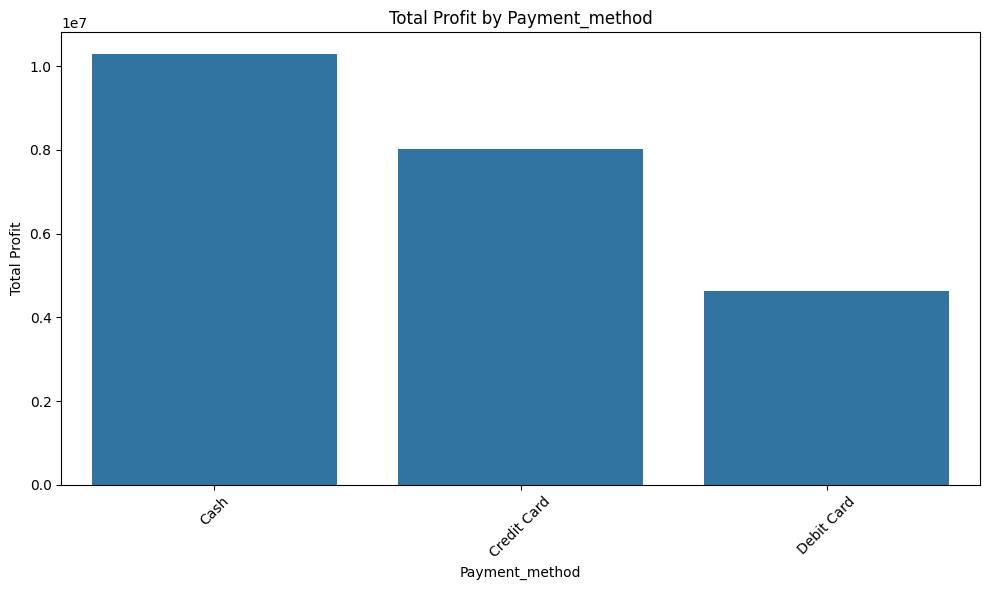

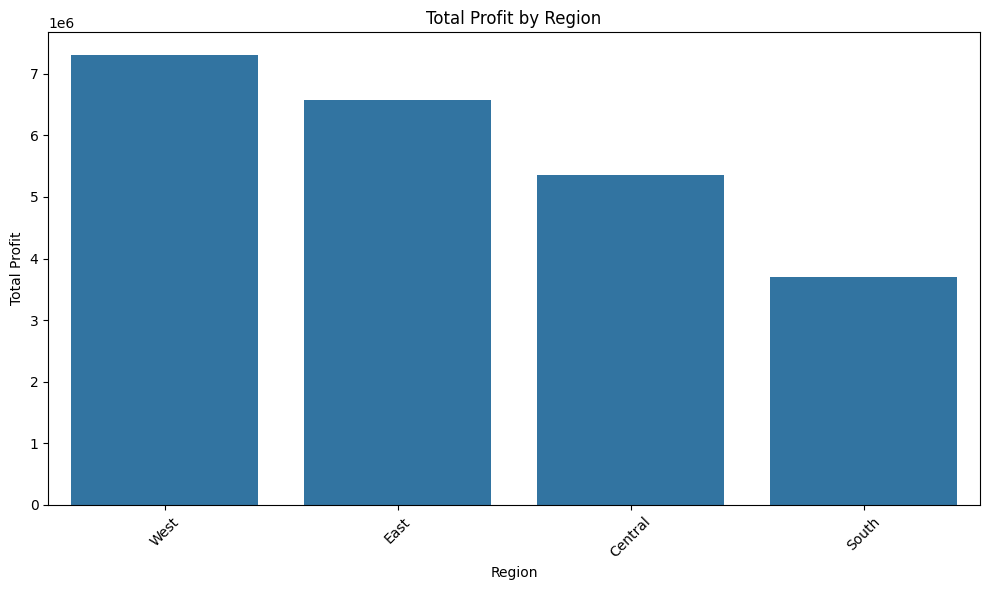

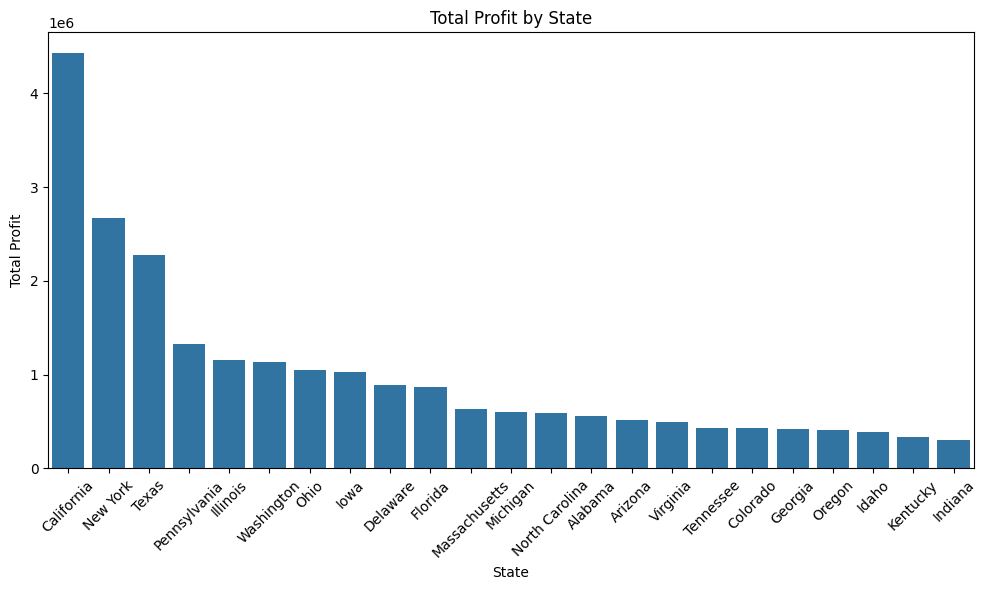

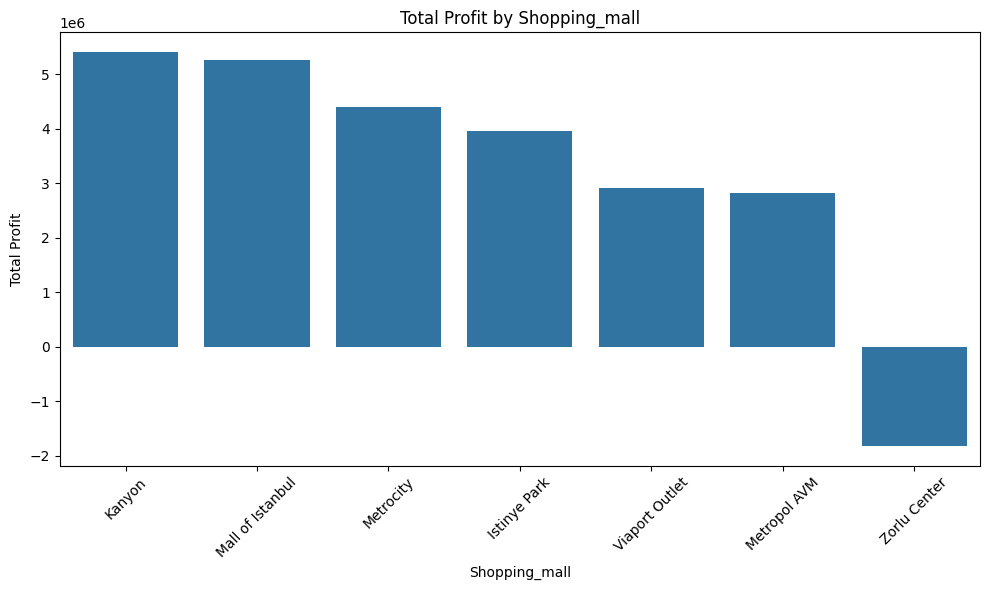

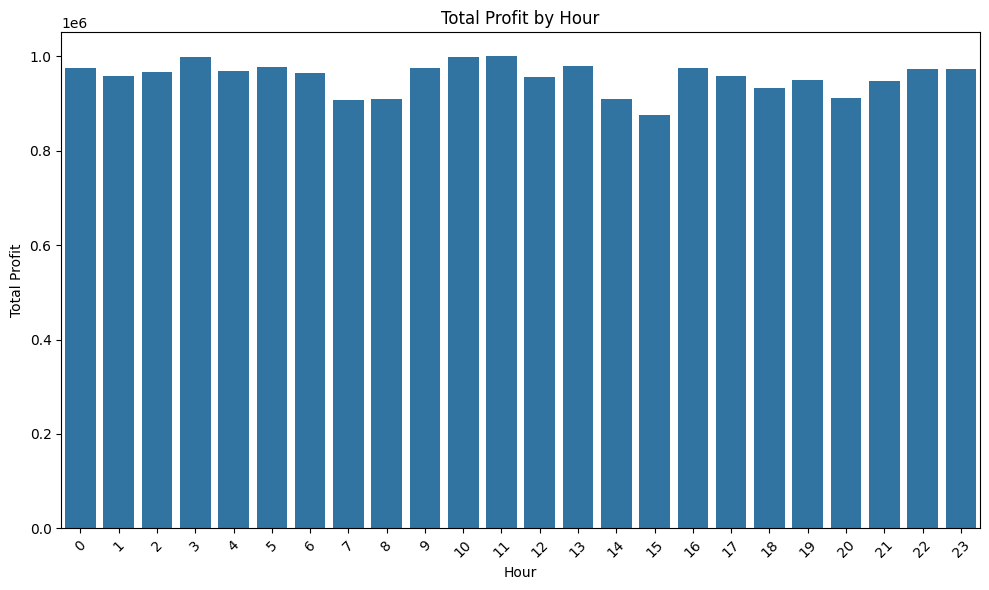

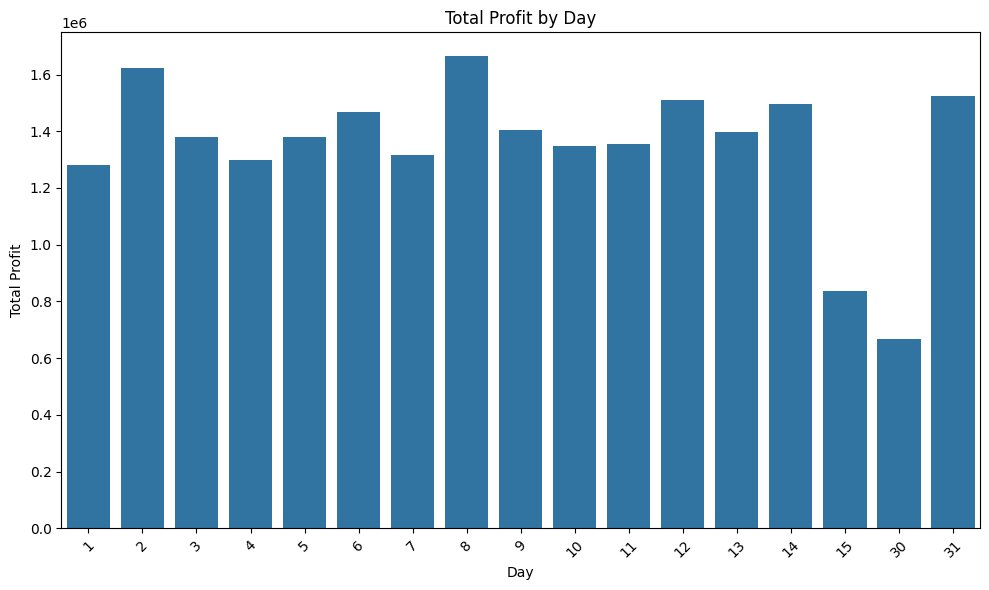

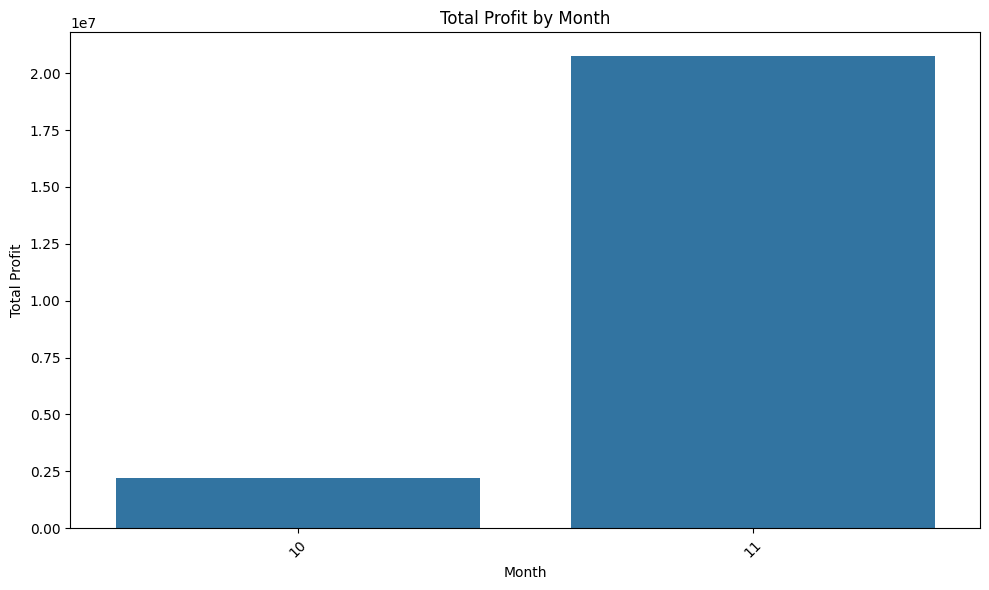

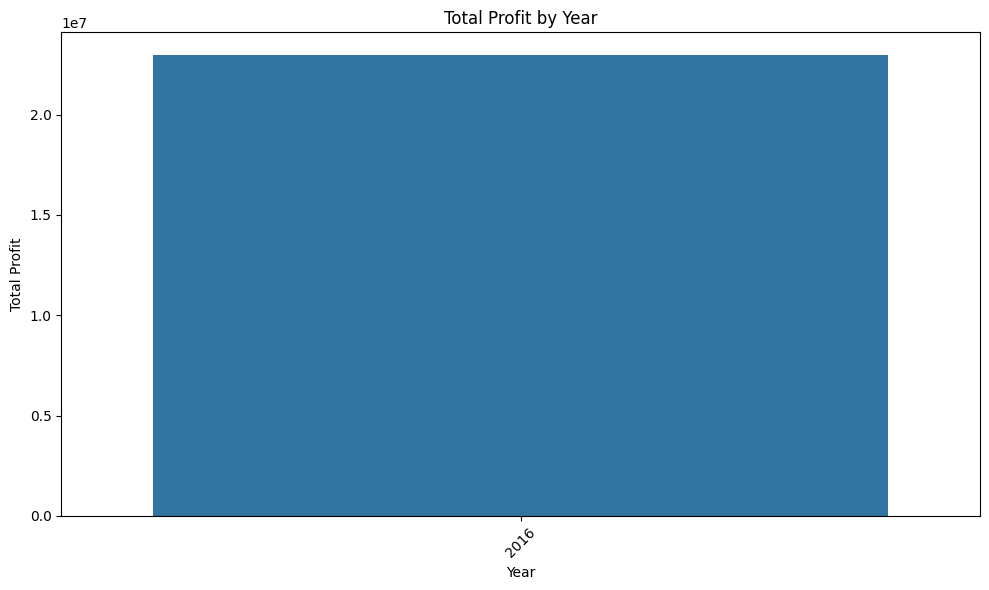

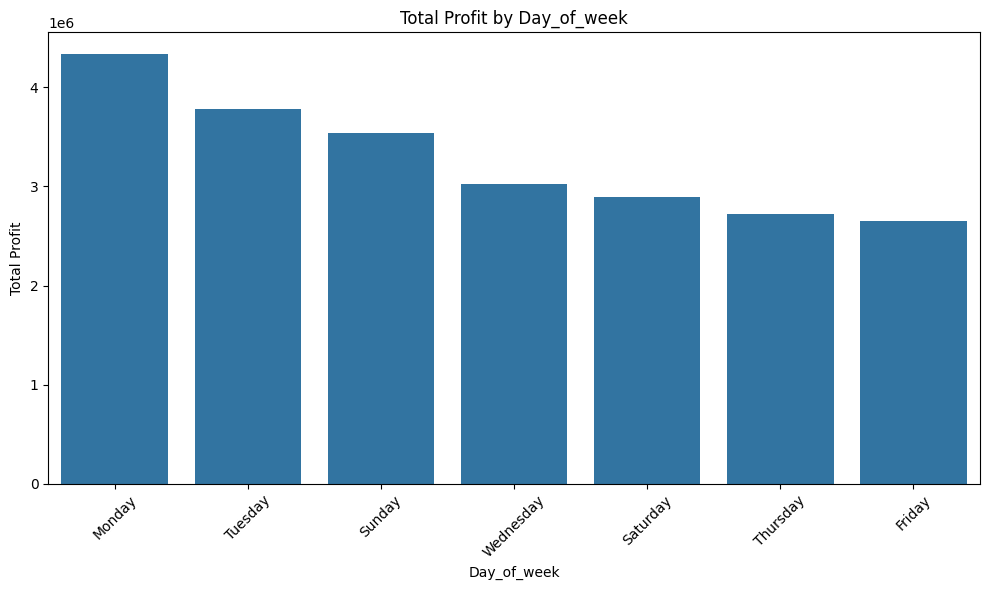

In [ ]:
# List of columns to visualize
columns = [
    'age_group', 'gender', 'category', 'payment_method', 'region', 'state',
    'shopping_mall', 'hour', 'day', 'month', 'year', 'day_of_week'
]

# Generate plots for each column
for each_column in columns:
    plot_total_profit_in_column(df, each_column)

# Number Transaction per Hour

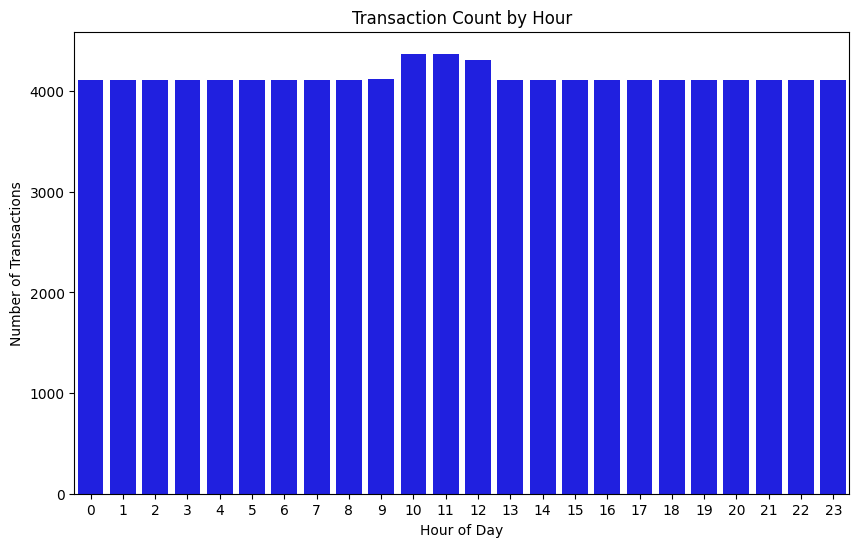

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, color='blue')  # Removed 'palette' argument
plt.title('Transaction Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

# PCA

In [58]:
def perform_pca(data, numerical_features):
    # Drop rows with missing values in the selected columns
    data_clean = data.dropna(subset=numerical_features)
    
    # Scale the numerical data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_clean[numerical_features])
    
    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    
    # Add PCA results to the dataset
    data_clean['PCA1'] = pca_result[:, 0]
    data_clean['PCA2'] = pca_result[:, 1]
    
    return data_clean

def plot_pca_with_color(data, color_column, title):
    # Check if the color column is categorical
    if data[color_column].dtype.name == 'category' or data[color_column].dtype == 'object':
        # Convert categorical values to numeric labels
        color_labels, unique_labels = pd.factorize(data[color_column])
        
        # Select appropriate colormap based on the number of categories
        if len(unique_labels) == 2:
            cmap = ['blue', 'orange']  # Use two distinct colors for binary categories
            c = [cmap[label] for label in color_labels]
            colorbar_labels = unique_labels
            colorbar_required = False  # Avoid creating a colorbar for binary categories
        else:
            cmap = 'tab20'  # Use a categorical colormap for more than 2 categories
            c = color_labels
            colorbar_labels = unique_labels
            colorbar_required = True
    else:
        # For numeric columns, use the actual data
        c = data[color_column]
        cmap = 'viridis'
        colorbar_labels = None
        colorbar_required = True

    # Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        data['PCA1'],
        data['PCA2'],
        c=c,
        cmap=cmap if isinstance(c, list) else None,
        alpha=0.7
    )
    if colorbar_required:
        cbar = plt.colorbar(scatter, label=color_column)
        if colorbar_labels is not None:
            # Add custom tick labels for categorical columns
            cbar.set_ticks(range(len(colorbar_labels)))
            cbar.set_ticklabels(colorbar_labels)

    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

numerical_features = ['quantity', 'selling_price_per_unit', 'total_profit']
df_clean = perform_pca(df, numerical_features)

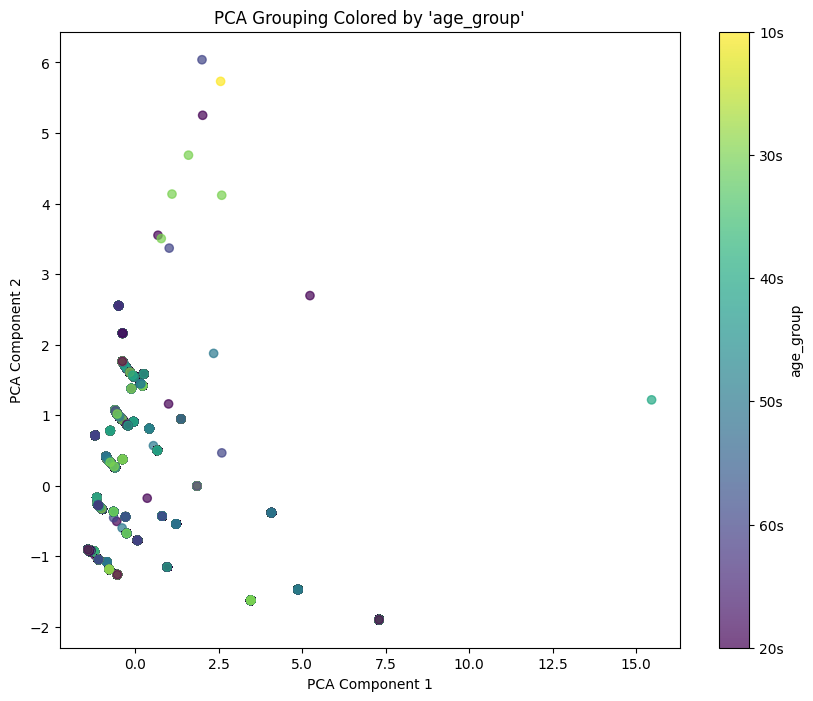

C:\Users\aero9\AppData\Local\Temp\ipykernel_42848\1679203422.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


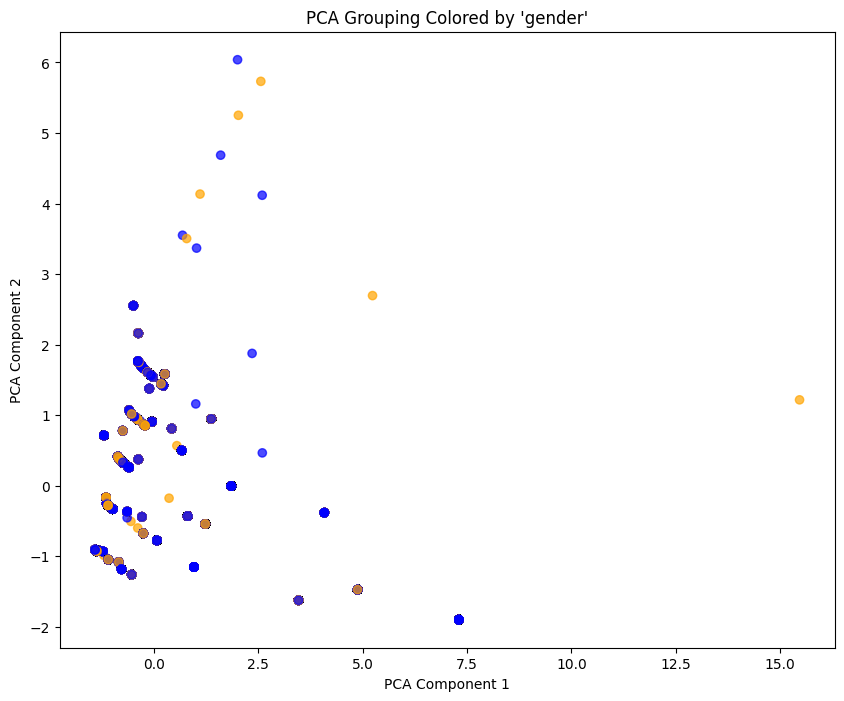

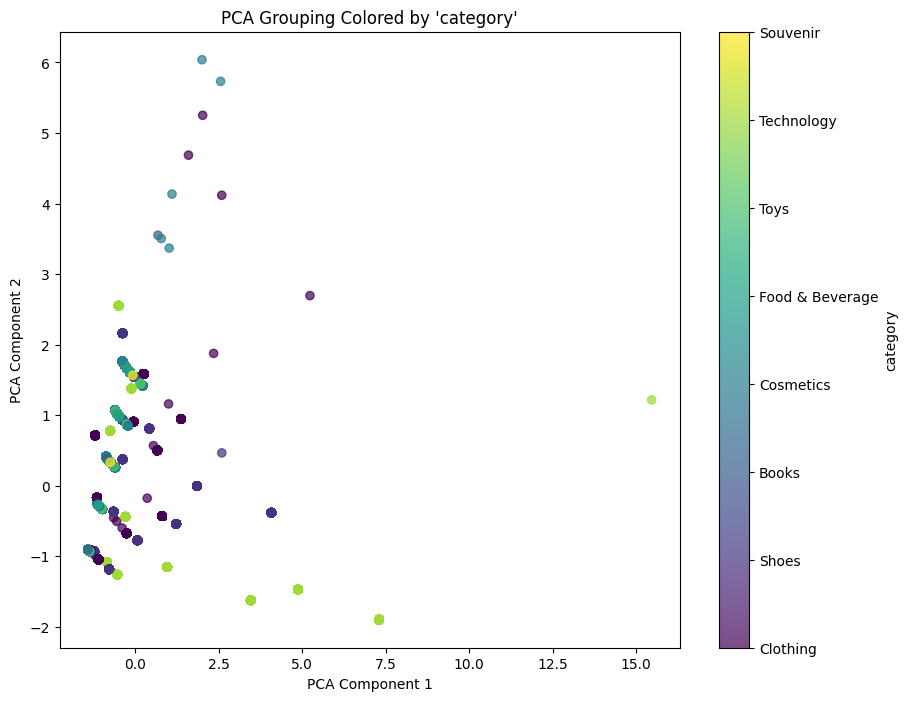

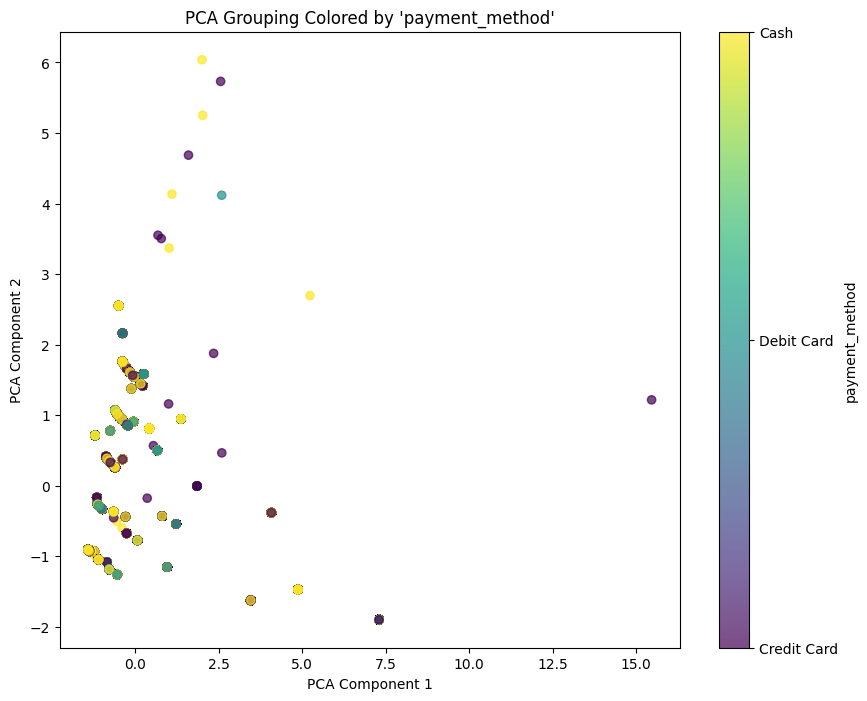

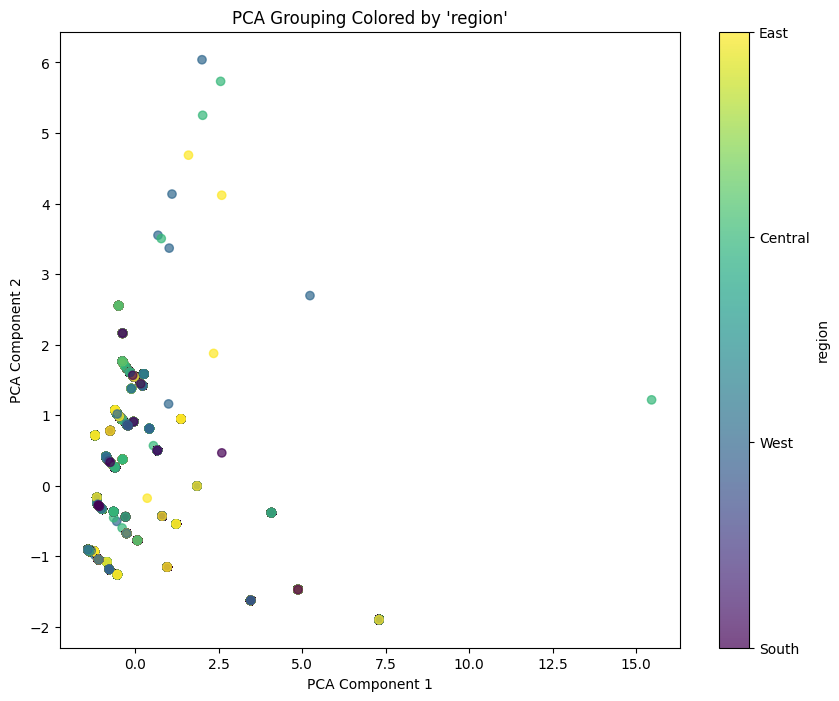

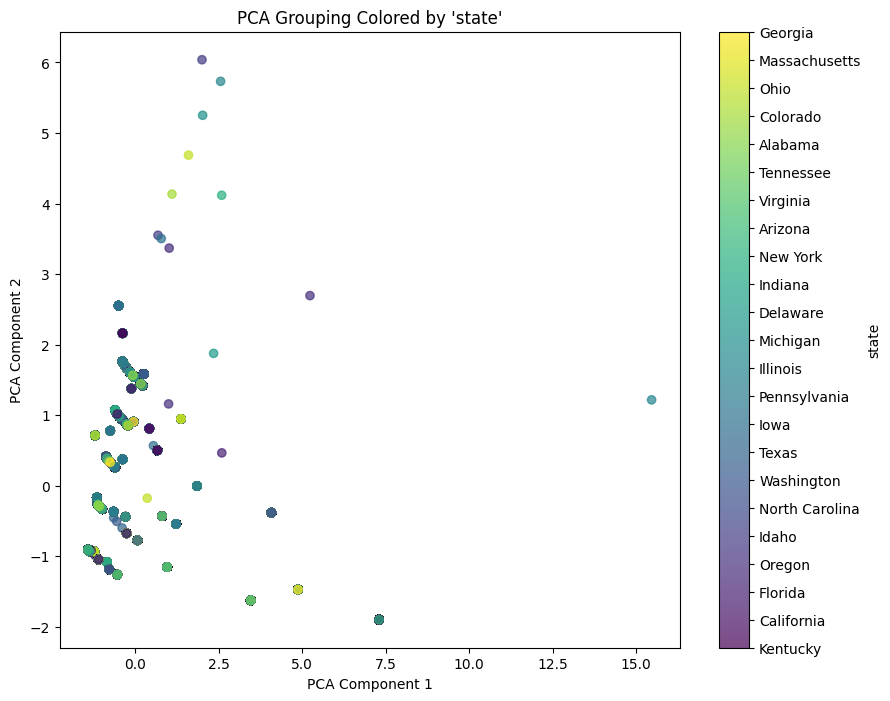

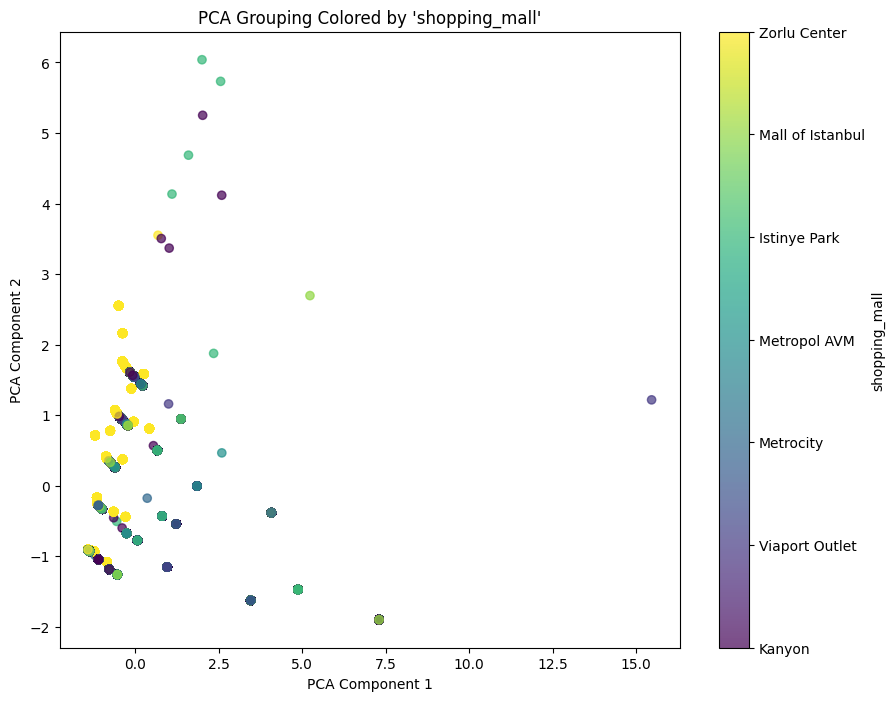

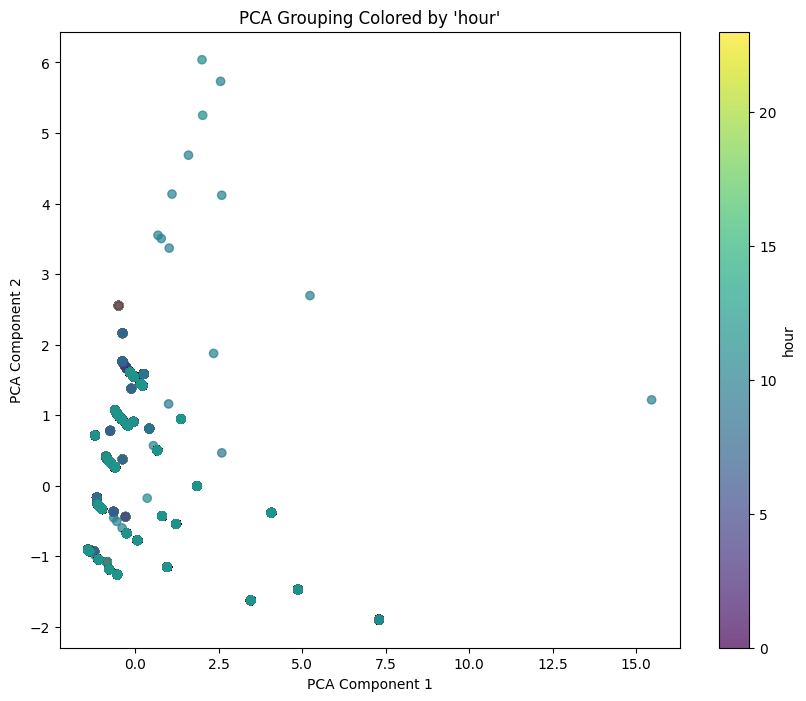

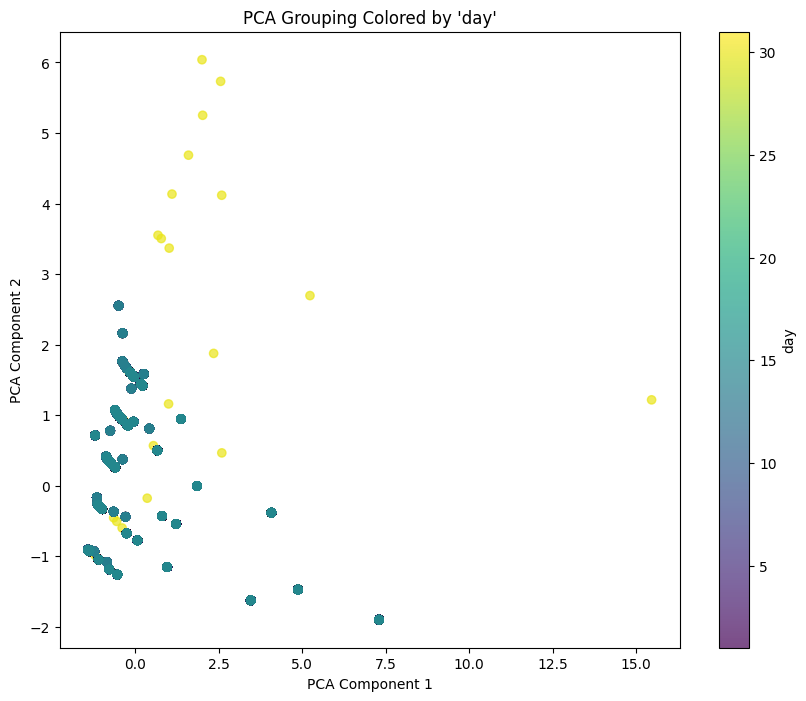

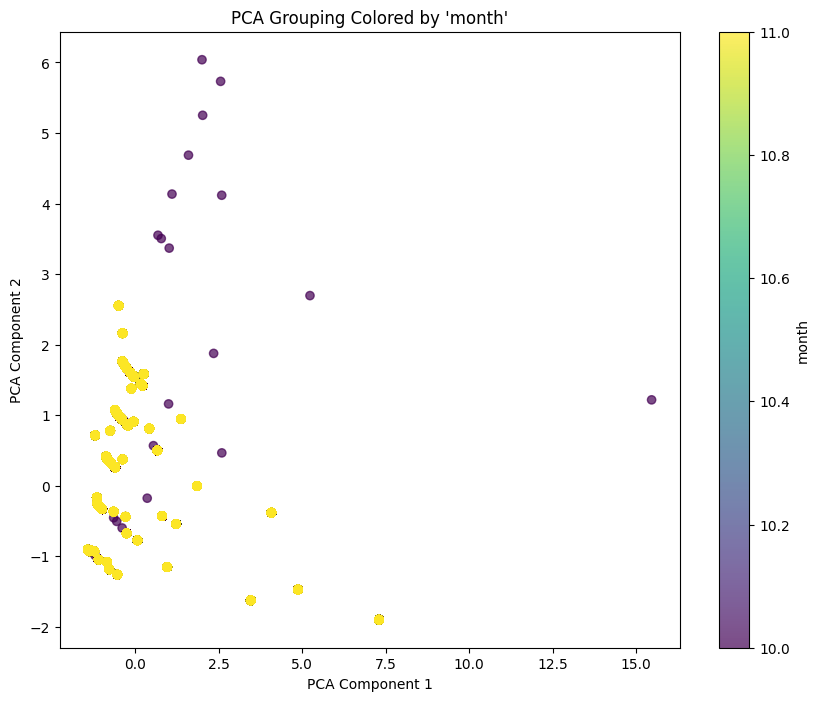

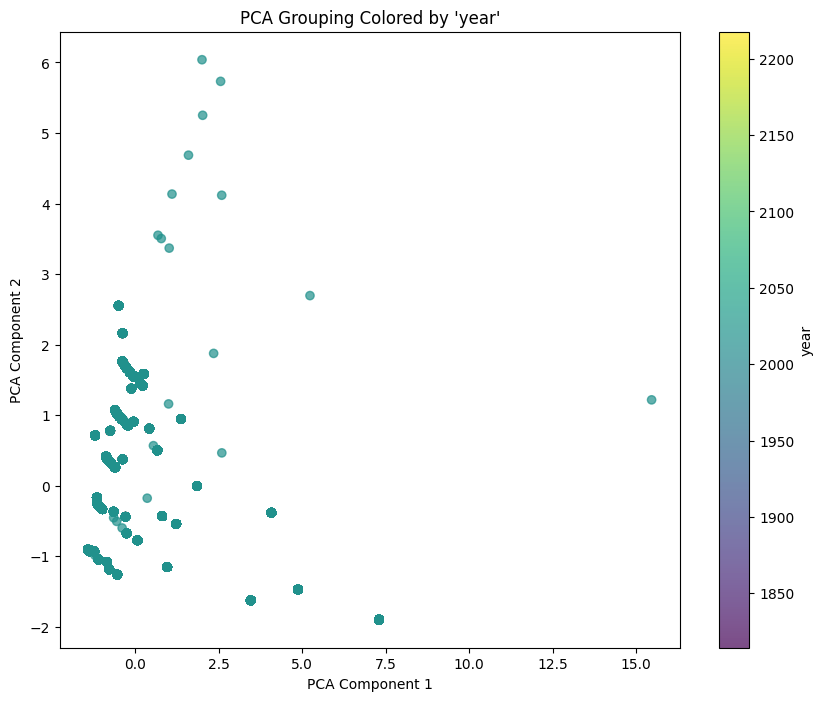

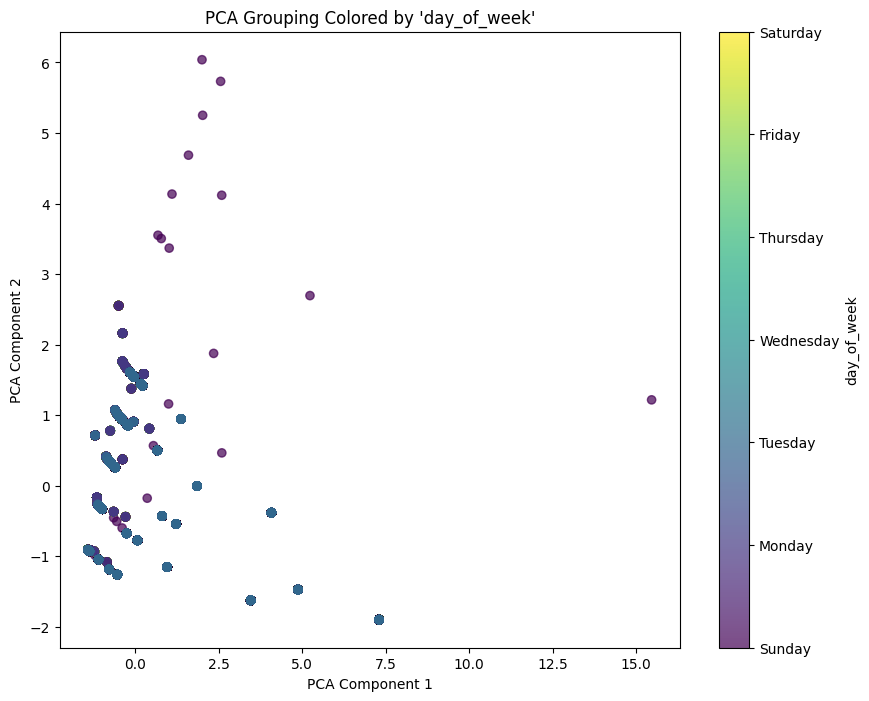

In [59]:
# List of columns to visualize
columns = [
    'age_group', 'gender', 'category', 'payment_method', 'region', 'state',
    'shopping_mall', 'hour', 'day', 'month', 'year', 'day_of_week'
]

# Generate plots for each column
for each_column in columns:
    plot_pca_with_color(df_clean, each_column, f"PCA Grouping Colored by '{each_column}'")